# Acquiring data from Kaggle
Download your kaggle.json and upload in collab

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

chmod: cannot access 'kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download fedesoriano/stroke-prediction-dataset
! ls

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
healthcare-dataset-stroke-data.csv  sample_data  stroke-prediction-dataset.zip


## Extract Zip File

In [ ]:
import zipfile
file = zipfile.ZipFile('stroke-prediction-dataset.zip')

file.extractall()

# EDA on the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def seeData(df):
    print('Jumlah data   = ', df.shape[0])
    print('Banyak fitur  = ', df.shape[1]-1)
    print('Nama Fitur    = \n', df.columns)
    print('Data Kosong   = \n', df.isnull().sum())    

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
seeData(df)

Jumlah data   =  5110
Banyak fitur  =  11
Nama Fitur    = 
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Data Kosong   = 
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
cat_columns = []
num_columns = []
target = ['stroke']
for i in df:
  if i != 'id' and i != 'stroke':
    if df[i].dtypes == 'object' or df[i].max()==1.0:
        cat_columns.append(i)
    elif df[i].dtypes != 'object':
        num_columns.append(i)
          
cat_columns, num_columns, target

(['gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status'],
 ['age', 'avg_glucose_level', 'bmi'],
 ['stroke'])

In [ ]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
for i in cat_columns :
    print ('Unique value on column {} is {}'.format(i, df[i].unique()))

Unique value on column gender is ['Male' 'Female' 'Other']
Unique value on column hypertension is [0 1]
Unique value on column heart_disease is [1 0]
Unique value on column ever_married is ['Yes' 'No']
Unique value on column work_type is ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique value on column Residence_type is ['Urban' 'Rural']
Unique value on column smoking_status is ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
df[df.isna().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# Delete id column in df
df.pop('id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_mean = df.fillna(df['bmi'].mean())
df_med = df.fillna(df['bmi'].median())
df_med

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [ ]:
df[df['gender']=='Other'].index

Int64Index([3116], dtype='int64')

In [ ]:
df.drop(df[df['gender']=='Other'].index, inplace=True)

## Data Visualization


### Heatmaps

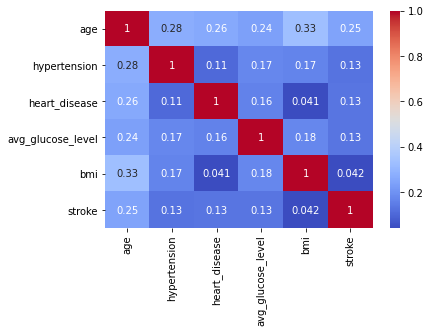

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

### Gender

(<function matplotlib.pyplot.show>, gender
 Female    2994
 Male      2115
 Name: gender, dtype: int64)

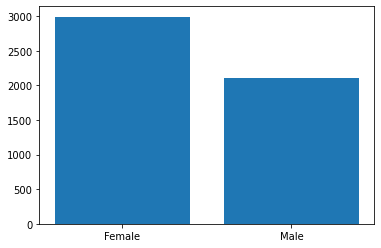

In [ ]:
df_gender = df['gender'].groupby(df['gender']).count()
plt.bar(df_gender.index, df_gender)
plt.show, df_gender

### Age

### BMI

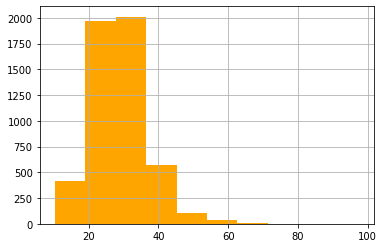

In [ ]:
df_mean['bmi'].hist(color='orange')

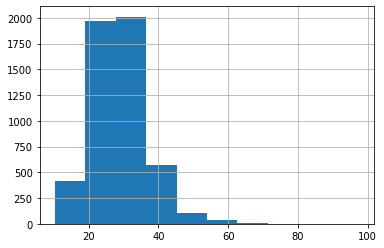

In [ ]:
df_med['bmi'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15e8d79710>,
      dtype=object)

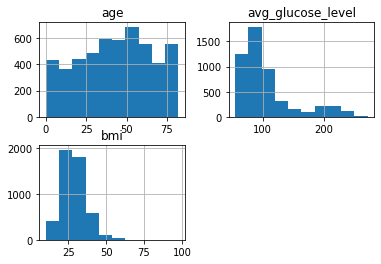

In [ ]:
df[num_columns].hist()

In [ ]:
def viewBarCatColumn(name_column):
  temp = df[name_column].groupby(df[name_column]).count()
  plt.title(name_column)
  plt.bar(temp.index, temp)
  plt.show()

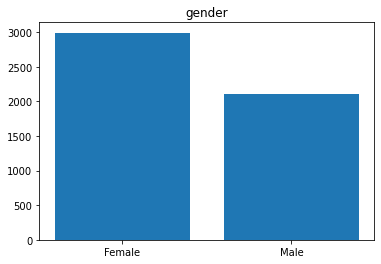

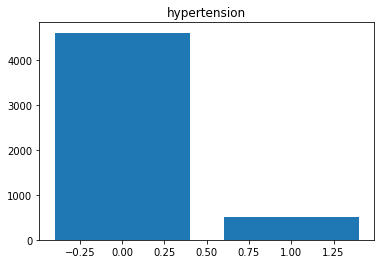

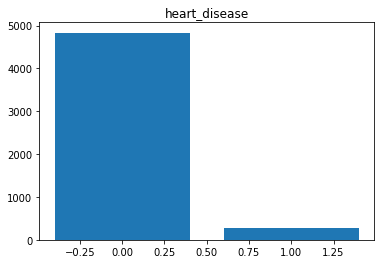

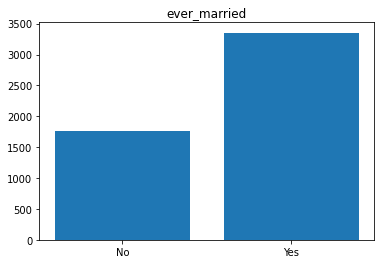

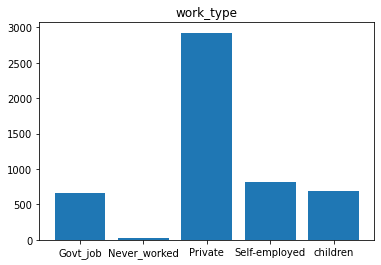

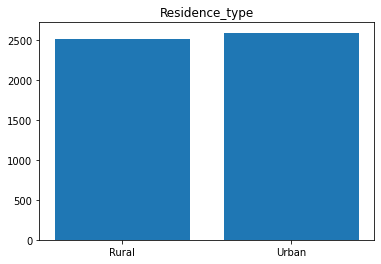

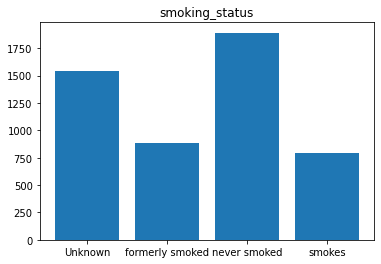

In [ ]:
for i in cat_columns :
  viewBarCatColumn(i)

# Coret Coretan

In [ ]:
df_test = df.copy()

In [ ]:
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
avg_glucose_lvl_cat = []


In [ ]:
for i in df_test["avg_glucose_level"]:
  if i < 70:
    avg_glucose_lvl_cat.append("low") 
  elif i >= 70 and i <= 139:
    avg_glucose_lvl_cat.append("normal")
  else:
    avg_glucose_lvl_cat.append("high")


In [ ]:

series_avg_glucose_lvl_cat = pd.Series(avg_glucose_lvl_cat)

In [ ]:
series_avg_glucose_lvl_cat

0         high
1         high
2       normal
3         high
4         high
         ...  
5104    normal
5105    normal
5106    normal
5107      high
5108    normal
Length: 5109, dtype: object

In [ ]:
df_test["Avg_glucose_lvl_cat"]= avg_glucose_lvl_cat

In [ ]:
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Avg_glucose_lvl_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,high
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,high
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,high
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,normal
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,normal
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,normal
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,high


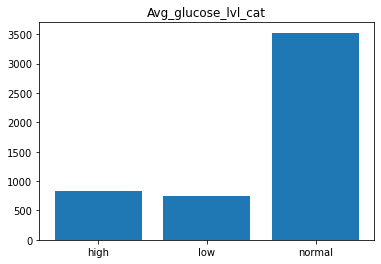

In [ ]:
temp = df_test["Avg_glucose_lvl_cat"].groupby(df_test["Avg_glucose_lvl_cat"]).count()
plt.title("Avg_glucose_lvl_cat")
plt.bar(temp.index, temp)
plt.show()

# Dokumentasi 17.05.2021
Making EDA and doing some prepocessing data for Dataset "Stroke Prediction Dataset". We making visualization for each features and from that we conclude that we should:

1. We changed the NaN values in BMI to the mean/average value of the BMI (28.89)
2. We visualized all of the features (11) in heatmap
3. We deleted Column "id" because we don't need it. (not useful for learning)
4. We deleted "other" value in Column "gender"
5. We converted column "avg_glucose_lvl" from numerical to categorical data.
6. We plotted the converted "avg_glucose_lvl" column